In [1]:
!pip install marimo -qq
import marimo as mo

## Домашнее задание 2
### Цель задания

Сегодня вы попробуете себя в роли аналитика мобильного трафика. Вам будет нужно помочь в принятии взвешенных решений по UX  и решить проблемы мошенничества в сфере интернет-рекламы. Защитите компанию, размещающую онлайн-рекламу от риска мошенничества с кликами, чтобы не было искажения данных о кликах и напрасной траты средств.


### Навыки

|Архитектура|Базы данных|Форматы данных|Инструменты|Коммуникации|ИИ     |
|-----------|-----------|--------------|-----------|------------|-------|
|Отсутствует|MySQL,PostgreSQL|jpg/png|Pillow|нет         |ChatGPT|


### Условия

Можно пользоваться любыми языковыми моделями.

###  Формат сдачи и отправка задания

Итоговый блокнот нужно разместить на GitLab либо на GitHub («запушить» в любом формате .py или .ipynb) и поделиться ссылкой на файл, убедившись в видимости репозитория.

###  Сроки выполнения задания

Дедлайн задания указан на платформе.

###  Критерии оценивания

| Критерий | Вес | Описание |
|----------|-----|-----------|
| **Основная функциональность** | 2 | Все основные требования задания выполнены корректно (задания 2 и 4) |
| | 1 | Большая часть требований выполнена, но есть незначительные недочеты или пропуски |
|  | 0 | Основные требования не выполнены или выполнены некорректно |
| **Выбор алгоритма** | 1.5 | Выбранные подходы и алгоритмы (например, groupby().sum()) оптимальны и уместны для задачи |
|  | 0.5 | Подходы в целом верны, но могли бы быть более эффективными или уместными |
|  | 0 | Подходы не соответствуют задаче |
| **Точность реализации** | 1.5 | Код реализован корректно, без ошибок, расчеты точны, логика полностью соответствует задаче |
|  | 0.5 | Есть мелкие неточности или логические ошибки, не влияющие критически на результат |
|  | 0 | Содержит существенные ошибки, препятствующие получению верного результата |
| **Обработка краевых случаев** | 1 | Код устойчив к различным входным данным, учтены потенциальные краевые условия |
|  | 0 | Краевые случаи не учтены, возможны ошибки в специфических сценариях |
| **Документация к коду** | 1 | Код прокомментирован, комментарии ясны, помогают понять логику |
|  | 0 | Комментарии отсутствуют или бесполезны |
| **Объяснение результатов** | 1 | Выводы по результатам работы кода четкие, логичные и обоснованные данными |
|  | 0 | Выводы отсутствуют или не имеют отношения к данным |
| **Стиль кода** | 1 | Код читаем, соответствует стандартам PEP-8 |
|  | 0 | Код плохо читаем, стандарты стиля не соблюдены |
| **Анализ ошибок и отладка** | 1 | Способность выявить, понять и исправить ошибки показана полностью и эффективно |
|  | 0 | Код содержит ошибки, они не исправлены или понимание их причин отсутствует |

**Максимальный балл за выполненную домашнюю работу: 10 баллов**

**Дополнительные условия оценки:**

Можно сдать работу через обычный Google Colab без начисления штрафных баллов и поделиться ссылкой на файл.

**Как будет проверяться:**

Работа будет проверяться преподавателем вручную в течение максимум одной недели.

In [2]:
#Обычно реальные пользователи тапают на экране в нижней зоне, потому что так удобнее
imga = mo.image(src="http://static.lukew.com/large_smartphones1.png", width=200, height=200,)
imga

Html()

### **Задание 1**

Чтобы работать с изображениями, вам понадобится библиотека pillow.

Скопируйте код, скачайте изображение на локальный компьютер: стандартный метод Image.open не может открывать нелокальные файлы.

Отобразите картинку в блокноте. Сравните, сколько действий понадобилось в сравнении с однострочником **mo.image**

```python
from PIL import Image
imgb = Image.open(r'http://static.lukew.com/large_smartphones1.png')
imgb
```

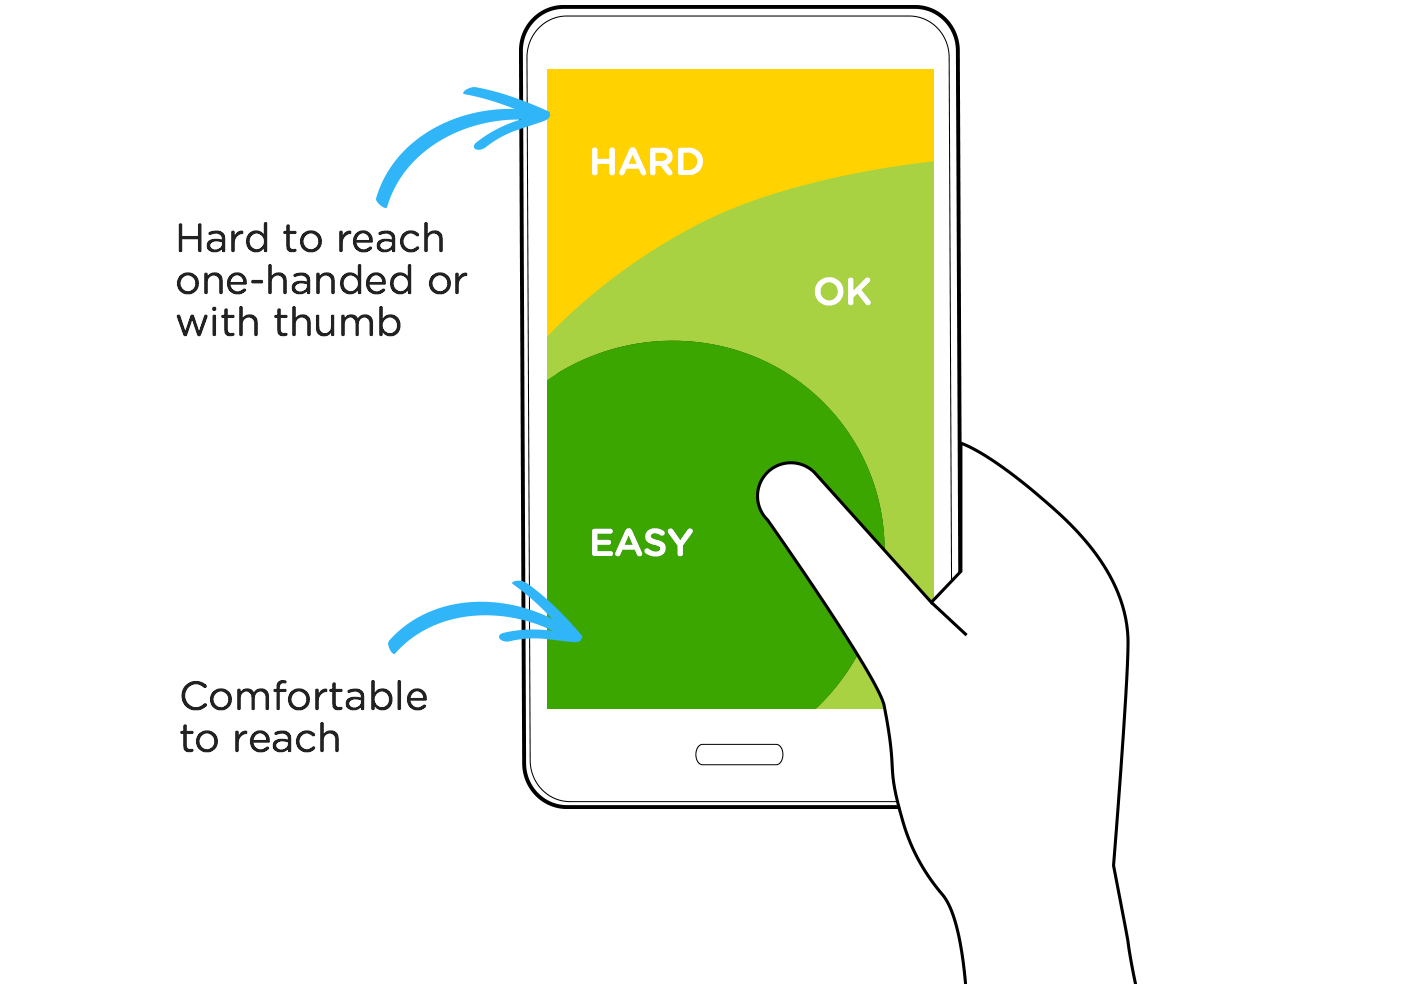

In [8]:
#Скопируйте код сюда и запустите
from PIL import Image
imgb = Image.open(r'large_smartphones1.png')
imgb

Копирование картинки на диск - явно лишнее действие

В команде говорят о том, что на рекламных блоках в приложении кликают боты. Похоже, данные это подтверждают.

Обратите внимание на колонку is_attributed, где 0 — это обычный пользователь, а 1 — это бот.

In [9]:
import numpy as np
import pandas as pd
file_id = '10__JGvVpWUzzucVHLcBdbPyVRYUeQ8Nl'
url = f'https://drive.google.com/uc?export=download&id={file_id}'
mobile_ads_fraud_dataset = pd.read_csv(url)
mobile_ads_fraud_dataset.head(1000)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0
...,...,...,...,...,...,...,...,...
995,10716,12,1,26,178,2017-11-08 00:54:22,NaN,0
996,4744,1,1,4,134,2017-11-08 06:24:53,NaN,0
997,120721,1,1,13,134,2017-11-06 21:40:57,NaN,0
998,118582,14,1,17,489,2017-11-09 14:19:10,NaN,0


In [10]:
mo.md("Ваш стартап начал разрабатывать прототип пользовательского интерфейса с учётом сбора данных о взаимодействии пользователя с приложением")
clicks_df=pd.DataFrame.from_dict([
  {
    "session": "S1746967768665_2927",
    "screen": "s10000_23817",
    "widget": "w10002_45621",
    "type": "WidgetClick",
    "time": 1746967770281,
    "scrollTop": 0,
    "x": 0.506,
    "y": 0.629,
    "appID": "68209a325c16386569ba37d3",
    "widgetName": "Primary Button",
    "screenName": "Screen"
  },
  {
    "session": "S1746967768665_2927",
    "screen": "s10000_23817",
    "widget": "w10001_12307",
    "type": "WidgetClick",
    "time": 1746967771832,
    "scrollTop": 0,
    "x": 0.514,
    "y": 0.453,
    "appID": "68209a325c16386569ba37d3",
    "widgetName": "Box",
    "screenName": "Screen"
  },
  {
    "session": "S1746967768665_2927",
    "screen": "s10000_23817",
    "widget": "w10002_45621",
    "type": "WidgetClick",
    "time": 1746967772625,
    "scrollTop": 0,
    "x": 0.549,
    "y": 0.629,
    "appID": "68209a325c16386569ba37d3",
    "widgetName": "Primary Button",
    "screenName": "Screen"
  },
  {
    "session": "S1746967768665_2927",
    "screen": "s10000_23817",
    "widget": "w10001_12307",
    "type": "WidgetClick",
    "time": 1746967773369,
    "scrollTop": 0,
    "x": 0.518,
    "y": 0.447,
    "appID": "68209a325c16386569ba37d3",
    "widgetName": "Box",
    "screenName": "Screen"
  },
  {
    "session": "S1746967768665_2927",
    "screen": "s10000_23817",
    "widget": "w10002_45621",
    "type": "WidgetClick",
    "time": 1746967774153,
    "scrollTop": 0,
    "x": 0.494,
    "y": 0.64,
    "appID": "68209a325c16386569ba37d3",
    "widgetName": "Primary Button",
    "screenName": "Screen"
  },
  {
    "session": "S1746967768665_2927",
    "screen": "s10000_23817",
    "widget": "w10001_12307",
    "type": "WidgetClick",
    "time": 1746967774729,
    "scrollTop": 0,
    "x": 0.474,
    "y": 0.482,
    "appID": "68209a325c16386569ba37d3",
    "widgetName": "Box",
    "screenName": "Screen"
  }
])
accordion = mo.accordion(
    {
        "Создадим прототип": mo.md("""```

services:
  mongo:
    restart: always
    container_name: quant-ux-mongo
    image: mongo
    volumes:
      - ./data:/data/db        # pth for the data to be stored and kept on your host machine is on the left side of the ":"
  qux-fe:
    restart: always
    container_name: quant-ux-frontend
    image: bmcgonag/qux-fe
    # image: bmcgonag/qux-fe-arm64
    environment:
      - QUX_PROXY_URL=http://quant-ux-backend:8080        # this is the path the front end uses to talk tot he backend
    links:
      - mongo
      - qux-be
    ports:
      - 8082:8082        # change the left side port if your host machine already has 8082 in use
    depends_on:
      - qux-be
  qux-be:
    restart: always
    container_name: quant-ux-backend
    image: bmcgonag/qux-be
    # image: bmcgonag/qux-be-arm64
    environment:
      - QUX_HTTP_HOST=http://quant-ux-frontend:8082        # this is the path the backend uses to talk to the front end
      - QUX_HTTP_PORT=8080        # This is the port the backend will use
      - QUX_MONGO_DB_NAME=quantux        # the database / collection name in mongodb
      - QUX_MONGO_TABLE_PREFIX=quantux        # table / document prefix in mongodb
      - QUX_MONGO_CONNECTION_STRING=mongodb://quant-ux-mongo:27017        # this assumes your mongodb container will be called "quant-ux-mongo" in the docker-compose file
      - QUX_MAIL_USER=mail_admin@example.com        # this should be your smtp email user
      - QUX_MAIL_PASSWORD=sTr0ngPa55w0Rd        # this should be your smtp email password
      - QUX_MAIL_HOST=127.0.0.1        # this should be your smtp host address
      - QUX_JWT_PASSWORD=some-long-string-of-mix-case-chars-and-nums        # you should change this to a real JWT secret
      - QUX_IMAGE_FOLDER_USER=/qux-images        # just a folder name, change if you like
      - QUX_IMAGE_FOLDER_APPS=/qux-image-apps        # just a folder name, change if you like
      - QUX_DEBUG=false        # valid values are true or false
      - TZ=Europe/Moscow        # change to your timezone
    depends_on:
      - mongo
```"""),
        "Запустим тест": mo.md("ссылка на [тест](http://45.153.69.219:8082/#/test.html?h=a2aa10aHIk8utSEvpzoSLkesWFHEO2MQUs6nxMFWf0VvfOwpFLIcQFLepIqy&ln=ru)"),
        "Посмотрим на данные": mo.ui.table(clicks_df),
        "Посчитаем клики": mo.md(f"всего кликов {clicks_df['type'].count()}")
    }
)
accordion

Html()

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import time
import warnings
warnings.filterwarnings('ignore')
X, y = mobile_ads_fraud_dataset.drop(['is_attributed','click_time','attributed_time'], axis=1), mobile_ads_fraud_dataset['is_attributed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
feature_names=X.columns.values.tolist()
target_names=y.unique().tolist()
clf = RandomForestClassifier(max_depth=2, random_state=0)
start = time.monotonic()
clf.fit(X_train, y_train)
print(f"модель обучена за: {time.monotonic() - start:.2f} секунд на целевую переменную",target_names)
y_pred = clf.predict(X_test)
print("RandomForestClassifier - отчёт по качеству работы модели:\n",
pd.DataFrame(classification_report(y_test, y_pred,  output_dict=True)).head().round(2))

модель обучена за: 1.67 секунд на целевую переменную [0, 1]
RandomForestClassifier - отчёт по качеству работы модели:
                  0     1  accuracy  macro avg  weighted avg
precision      1.0   0.0       1.0        0.5          0.99
recall         1.0   0.0       1.0        0.5          1.00
f1-score       1.0   0.0       1.0        0.5          1.00
support    19949.0  51.0       1.0    20000.0      20000.00


Почему классификатор игнорирует наличие кликов от ботов?

Давайте посмотрим на распределение кликов пользователей и ботов.

In [12]:
print(y.value_counts())

is_attributed
0    99773
1      227
Name: count, dtype: int64


Сбалансируем клики пользователей и ботов.

In [13]:
from imblearn.over_sampling import SMOTEN;start1 = time.monotonic()
sm = SMOTEN(random_state=42, k_neighbors=2)
X_res, y_res = sm.fit_resample(X, y)
X_trainb, X_testb, y_trainb, y_testb = train_test_split(X_res, y_res, test_size=.2, shuffle=True, random_state=42)
print(f"""Теперь классы сбалансированы\n{y_trainb.value_counts()}\nвремя ресемплинга: {time.monotonic() - start1:.2f} секунд""")

Теперь классы сбалансированы
is_attributed
0    79822
1    79814
Name: count, dtype: int64
время ресемплинга: 17.70 секунд


### **Задание 2**

Объясните, чем метод [SMOTEN](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTEN.html) отличается от метода [resample](https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html)?

- `SMOTEN` синтезирует новые объекты для минорного класса, подбирая k ближайших соседей в дискретном признаковом пространстве и комбинируя их категориальные значения; метод учитывает структуру признаков и генерирует ранее не встречавшиеся строки.
- `sklearn.utils.resample` выполняет простое переупорядочивание/дублирование существующих наблюдений (bootstrap, undersample/oversample) без построения новых комбинаций признаков, поэтому он лишь меняет частоту уже имеющихся записей.
=> В отличие от `resample`, `SMOTEN` создаёт синтетические примеры с учётом соседства, что снижает риск переобучения на дубликатах и лучше сохраняет локальную структуру данных.


In [14]:
clfb = RandomForestClassifier(max_depth=2, random_state=0)
start2 = time.monotonic()
clfb.fit(X_trainb, y_trainb)
print(f"модель обучена за: {time.monotonic() - start2:.2f} секунд на целевую переменную",target_names)
y_predb = clfb.predict(X_testb)
print("RandomForestClassifier - отчет по качеству работы модели:\n",
pd.DataFrame(classification_report(y_testb, y_predb,  output_dict=True)).head().round(2),
     "\n\n теперь все нормально - наш классификатор показывает схожую точность на кликах и пользователей, и ботов")

модель обучена за: 3.01 секунд на целевую переменную [0, 1]
RandomForestClassifier - отчет по качеству работы модели:
                   0         1  accuracy  macro avg  weighted avg
precision      0.76      0.86       0.8       0.81          0.81
recall         0.88      0.72       0.8       0.80          0.80
f1-score       0.82      0.78       0.8       0.80          0.80
support    19951.00  19959.00       0.8   39910.00      39910.00 

 теперь все нормально - наш классификатор показывает схожую точность на кликах и пользователей, и ботов


In [15]:
# поскольку ресемплинг большого набора данных может занять продолжительное время, имеет смысл сохранить сбалансированные классы
with open('X_res.npy', 'wb') as f:np.save(f, X_res)
with open('y_res.npy', 'wb') as f:np.save(f, y_res)

In [16]:
callout = mo.callout(mo.md(r"""Давайте вспомним вывод, к которому мы пришли в ходе выполнения домашнего задания №1: **хранить данные на локальном диске — это плохая идея**"""), kind="danger")
callout

Html()

### **Задание 3**

Сохраните результат своей работы (артефакт — ресемплированный большой набор данных) в 2 базы данных (MySQL и PostgreSQL), чтобы дать возможность коллегам пользоваться артефактом и удобно с ним работать. Логин/пароль для доступа в базу вы получили на вебинаре №2.

In [21]:
# Сохраняем сбалансированный датасет в MySQL и PostgreSQL
import sys
import subprocess
import json
from pathlib import Path
from urllib.parse import quote_plus
import time

# Убедимся, что необходимые пакеты присутствуют в окружении ноутбука

def ensure_package(module_name, pip_name=None):
    try:
        __import__(module_name)
    except ImportError:
        pip_name = pip_name or module_name
        subprocess.check_call([
            sys.executable,
            "-m",
            "pip",
            "install",
            pip_name,
        ])

ensure_package("sqlalchemy")
ensure_package("pymysql")
ensure_package("psycopg2", "psycopg2-binary")

from sqlalchemy import create_engine
import numpy as np
import pandas as pd

# Подтягиваем секреты из внешнего JSON, чтобы не хранить их в явном виде в ноутбуке
secrets_path = Path("db_secrets.json")
if not secrets_path.exists():
    raise FileNotFoundError("Файл db_secrets.json не найден — добавьте его рядом с ноутбуком.")

with secrets_path.open(encoding="utf-8") as fh:
    secrets = json.load(fh)

mysql_cfg = secrets.get("mysql", {})
postgres_cfg = secrets.get("postgres", {})

if not mysql_cfg or not postgres_cfg:
    raise ValueError("В db_secrets.json должны быть секции 'mysql' и 'postgres'.")

# Готовим строку подключения c URL-экранированием логина и пароля
mysql_conn = (
    "mysql+pymysql://"
    f"{quote_plus(mysql_cfg['user'])}:{quote_plus(mysql_cfg['password'])}"
    f"@{mysql_cfg['host']}:{mysql_cfg['port']}/{mysql_cfg['database']}"
    f"?charset={mysql_cfg.get('charset', 'utf8mb4')}"
)
postgres_conn = (
    "postgresql+psycopg2://"
    f"{quote_plus(postgres_cfg['user'])}:{quote_plus(postgres_cfg['password'])}"
    f"@{postgres_cfg['host']}:{postgres_cfg['port']}/{postgres_cfg['database']}"
)

try:
    X_res
    y_res
except NameError:
    # Если массивы не в памяти, читаем сохраненные артефакты
    X_res = np.load("X_res.npy", allow_pickle=True)
    y_res = np.load("y_res.npy", allow_pickle=True)
    if isinstance(X_res, np.ndarray) and X_res.dtype == object and X_res.shape == ():
        X_res = X_res.item()
    if isinstance(y_res, np.ndarray) and y_res.dtype == object and y_res.shape == ():
        y_res = y_res.item()

if "feature_names" in globals():
    feature_cols = feature_names
elif "X" in globals() and hasattr(X, "columns"):
    feature_cols = X.columns.tolist()
else:
    feature_cols = [f"feature_{idx}" for idx in range(X_res.shape[1])]

if isinstance(X_res, pd.DataFrame):
    resampled_df = X_res.copy()
else:
    resampled_df = pd.DataFrame(X_res, columns=feature_cols)

if "is_attributed" not in resampled_df.columns:
    if isinstance(y_res, pd.Series):
        resampled_df["is_attributed"] = y_res.reset_index(drop=True)
    else:
        resampled_df["is_attributed"] = pd.Series(y_res, name="is_attributed")

resampled_df = resampled_df.reset_index(drop=True)

numeric_cols = resampled_df.select_dtypes(include="integer").columns.tolist()
for col in numeric_cols:
    resampled_df[col] = resampled_df[col].astype("int64")

resampled_df["is_attributed"] = resampled_df["is_attributed"].astype("int64")

print(f"Готовим к выгрузке {len(resampled_df):,} строк".replace(",", " "))

table_name = "mobile_ads_resampled"

# MySQL требует TLS: используем пустой словарь для включения шифрованного канала или CA-файл, если он лежит рядом
mysql_connect_args = {"ssl": {"ssl": {}}}
mysql_ca = secrets.get("mysql", {}).get("ca_file")
if not mysql_ca:
    fallback_ca = Path("mysql-server-ca.pem")
    if fallback_ca.exists():
        mysql_ca = str(fallback_ca)
if mysql_ca:
    mysql_connect_args = {"ssl": {"ca": mysql_ca}}

postgres_connect_args = {}

from typing import Dict, Any

# Храним замеры времени, чтобы использовать их в следующих заданиях без повторной записи
sql_timings = {}

# Унифицированная функция сохранения, чтобы не дублировать логику для БД

def persist_dataframe(df: pd.DataFrame, conn_str: str, label: str, connect_args: Dict[str, Any] | None = None):
    start_time = time.monotonic()
    engine = create_engine(conn_str, connect_args=connect_args or {})
    try:
        df.to_sql(
            table_name,
            con=engine,
            if_exists="replace",
            index=False,
            chunksize=20000,
            method="multi",
        )
        elapsed = time.monotonic() - start_time
        sql_timings[label] = elapsed
        print(f"OK Данные записаны в {label} (таблица {table_name}) за {elapsed:.2f} с.")
    except Exception as exc:
        elapsed = time.monotonic() - start_time
        sql_timings[label] = None
        print(f"WARNING Ошибка при записи в {label} (прошло {elapsed:.2f} с): {exc}")

for conn_str, label, connect_args in (
    (mysql_conn, "MySQL", mysql_connect_args),
    (postgres_conn, "PostgreSQL", postgres_connect_args),
):
    persist_dataframe(resampled_df, conn_str, label, connect_args)



Готовим к выгрузке 199 546 строк
OK Данные записаны в MySQL (таблица mobile_ads_resampled) за 34.42 с.
OK Данные записаны в PostgreSQL (таблица mobile_ads_resampled) за 36.81 с.


### **Задание 4**

Если мы точно не знаем, в какую базу писать, то [«не стоит плодить таблицы без необходимости»](https://ru.wikipedia.org/wiki/%D0%91%D1%80%D0%B8%D1%82%D0%B2%D0%B0_%D0%9E%D0%BA%D0%BA%D0%B0%D0%BC%D0%B0). Сохраним данные в хранилище S3.

Реализуйте сохранение артефакта (ресемплированного большого набора данных) в хранилище S3.
Сравните скорость записи в SQL и в хранилище S3.

In [28]:
# Сохраняем артефакт в S3 и сравниваем скорость с SQL
import json
import sys
import time
import subprocess
from pathlib import Path
import io

# Подгружаем вспомогательную функцию, если ячейка из задания 3 ещё не выполнялась
if "ensure_package" not in globals():
    def ensure_package(module_name, pip_name=None):
        try:
            __import__(module_name)
        except ImportError:
            pip_name = pip_name or module_name
            subprocess.check_call([
                sys.executable,
                "-m",
                "pip",
                "install",
                pip_name,
            ])

ensure_package("boto3")

import numpy as np
import pandas as pd
import boto3

# Загружаем секреты из общего файла, чтобы не держать ключи в коде
secrets_path = Path("db_secrets.json")
if not secrets_path.exists():
    raise FileNotFoundError("Файл db_secrets.json не найден — добавьте его рядом с ноутбуком.")

with secrets_path.open(encoding="utf-8") as fh:
    secrets = json.load(fh)

s3_cfg = secrets.get("s3", {})
if not s3_cfg:
    raise ValueError("В db_secrets.json должна быть секция 's3'.")

# Если датафрейм ещё не собран, восстанавливаем его из сохранённых артефактов
if "resampled_df" not in globals():
    try:
        X_res
        y_res
    except NameError:
        X_res = np.load("X_res.npy", allow_pickle=True)
        y_res = np.load("y_res.npy", allow_pickle=True)
        if isinstance(X_res, np.ndarray) and X_res.dtype == object and X_res.shape == ():
            X_res = X_res.item()
        if isinstance(y_res, np.ndarray) and y_res.dtype == object and y_res.shape == ():
            y_res = y_res.item()

    if "feature_names" in globals():
        feature_cols = feature_names
    elif "X" in globals() and hasattr(X, "columns"):
        feature_cols = X.columns.tolist()
    else:
        feature_cols = [f"feature_{idx}" for idx in range(X_res.shape[1])]

    if isinstance(X_res, pd.DataFrame):
        resampled_df = X_res.copy()
    else:
        resampled_df = pd.DataFrame(X_res, columns=feature_cols)

    if "is_attributed" not in resampled_df.columns:
        if isinstance(y_res, pd.Series):
            resampled_df["is_attributed"] = y_res.reset_index(drop=True)
        else:
            resampled_df["is_attributed"] = pd.Series(y_res, name="is_attributed")

    resampled_df = resampled_df.reset_index(drop=True)

    numeric_cols = resampled_df.select_dtypes(include="integer").columns.tolist()
    for col in numeric_cols:
        resampled_df[col] = resampled_df[col].astype("int64")

    resampled_df["is_attributed"] = resampled_df["is_attributed"].astype("int64")

print(f"Для выгрузки готово {len(resampled_df):,} строк".replace(",", " "))

# Готовим CSV в памяти и отправляем в S3-совместимое хранилище

s3_client = boto3.client(
    "s3",
    endpoint_url=s3_cfg["endpoint"],
    aws_access_key_id=s3_cfg["access_key"],
    aws_secret_access_key=s3_cfg["secret_key"],
    region_name=s3_cfg.get("region", "us-east-1")
)

object_prefix = s3_cfg.get("prefix", "mobile_ads")
object_key = f"{object_prefix}/mobile_ads_resampled_{int(time.time())}.csv"

csv_buffer = io.StringIO()
resampled_df.to_csv(csv_buffer, index=False)
csv_bytes = csv_buffer.getvalue().encode("utf-8")

start_s3 = time.monotonic()
try:
    s3_client.put_object(
        Bucket=s3_cfg["bucket"],
        Key=object_key,
        Body=csv_bytes,
        ContentType="text/csv",
    )
    s3_elapsed = time.monotonic() - start_s3
    print(f"OK S3: файл {object_key} записан за {s3_elapsed:.2f} с")
except Exception as exc:
    s3_elapsed = None
    print(f"WARNING S3: не удалось записать объект -> {exc}")

# Итоговое сравнение скоростей: используем замеры SQL из задания 3 и свежий замер S3
print("\nСкорость записи, с:")
if "sql_timings" in globals() and sql_timings:
    for label in ("MySQL", "PostgreSQL"):
        value = sql_timings.get(label)
        print(f" - {label}: {value:.2f} с" if value is not None else f" - {label}: ошибка при записи")
else:
    print(" - SQL: нет данных (сначала выполните ячейку из задания 3)")
print(f" - S3: {s3_elapsed:.2f} с" if s3_elapsed is not None else " - S3: ошибка при записи")



Для выгрузки готово 199 546 строк
WARNING S3: не удалось записать объект -> Connection was closed before we received a valid response from endpoint URL: "http://45.153.68.194:9001/firstbucket250915/mobile_ads/mobile_ads_resampled_1761596631.csv".

Скорость записи, с:
 - MySQL: 34.42 с
 - PostgreSQL: 36.81 с
 - S3: ошибка при записи


Не удалось записать в S3. Пробовал менять порт на 9001, как рекомендовал ChatGPT - не помогло. Наверное, вы закрыли доступ или удалили бакет, так как я поздно делаю задание. Логично предположить, что S3 будет быстрее работать на запись, так как по сути мы просто кладем созаднный csv файл в хранилище. В SQL БД запись идет построчно и для каждой строки проводится проверка типа данных, других ограничений. Жаль, что мне не удалось проверить. Возможно, позже разберусь с Docker и MinIO для запуска своей S3 локально

### **Задание 5**

Как бы вы реализовали сохранение полученной модели классификатора с учетом того, что данные, на которых обучалась модель, могут со временем изменяться?

Будем сохранять модели в отдельную локальную папку. Для этого будем использовать joblib. Pickle бы тоже подошел, но joblib дает лучшую производительность и размер файлов для типичных sklearn пайплайнов. Кроме самой модели будем хранить метрики, вермя записи модели и ее идентификатор через хэширование

In [29]:
# Сохраняем версию модели с учётом возможного дрейфа данных
import json
import hashlib
from datetime import datetime
from pathlib import Path

ensure_package("joblib")

import joblib
import pandas as pd
from sklearn.metrics import classification_report

ARTIFACT_ROOT = Path("model_registry")
ARTIFACT_ROOT.mkdir(exist_ok=True)

def calc_data_fingerprint(df: pd.DataFrame) -> str:
    """Грубый идентификатор датасета: хэш по статистикам признаков."""
    summary = {}
    for col in df.columns:
        series = df[col]
        if pd.api.types.is_numeric_dtype(series):
            summary[col] = {
                "mean": float(series.mean()),
                "std": float(series.std()),
                "min": float(series.min()),
                "max": float(series.max()),
            }
        else:
            summary[col] = {
                "top": series.value_counts().head(3).to_dict()
            }
    payload = json.dumps(summary, sort_keys=True).encode("utf-8")
    return hashlib.sha256(payload).hexdigest()

def save_model_version(model, train_df: pd.DataFrame, metrics: dict[str, float], *, model_name: str = "rf_mobile_ads") -> Path:
    timestamp = datetime.utcnow().strftime("%Y%m%dT%H%M%SZ")
    version_dir = ARTIFACT_ROOT / model_name / timestamp
    version_dir.mkdir(parents=True, exist_ok=True)

    joblib.dump(model, version_dir / "model.joblib")
    metadata = {
        "model_name": model_name,
        "created_at_utc": timestamp,
        "data_fingerprint": calc_data_fingerprint(train_df),
        "metrics": metrics,
        "features": train_df.columns.tolist(),
        "rows": len(train_df),
    }
    (version_dir / "metadata.json").write_text(
        json.dumps(metadata, ensure_ascii=False, indent=2),
        encoding="utf-8",
    )
    return version_dir

if "clfb" not in globals():
    raise NameError("Сначала обучите модель (ячейки задания 1–3) — объект clfb не найден.")

metrics_report = classification_report(y_testb, y_predb, output_dict=True)
metrics_short = {
    "precision_macro": round(metrics_report["macro avg"]["precision"], 4),
    "recall_macro": round(metrics_report["macro avg"]["recall"], 4),
    "f1_macro": round(metrics_report["macro avg"]["f1-score"], 4),
    "accuracy": round(metrics_report["accuracy"], 4),
}

model_path = save_model_version(clfb, resampled_df, metrics_short)
print(f"Модель сохранена: {model_path}")
print(json.dumps(metrics_short, indent=2))
print(    "Совет: отслеживайте fingerprint и метрики во времени; при существенных изменениях запускайте переобучение и публикуйте новую версию.")


Модель сохранена: model_registry/rf_mobile_ads/20251027T204339Z
{
  "precision_macro": 0.8093,
  "recall_macro": 0.8009,
  "f1_macro": 0.7995,
  "accuracy": 0.8009
}
Совет: отслеживайте fingerprint и метрики во времени; при существенных изменениях запускайте переобучение и публикуйте новую версию.
